In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
from mpltools import annotation

In [2]:
# Import the .txt-file generated by 'autotest.sh'
txtname = "tree_test.txt"
data = np.loadtxt(txtname)
data.shape

(24, 7)

In [3]:
# Map boolean input of quadrupoles to strings.
def convert(x):
    if x == 0:
        return "Mono"
    else:
        return "Quad"

In [4]:
N      = "N"
theta  = "$\\theta_c$"
quad   = "Multipole expansion"
tree   = "Tree code t(s)"
dirsum = "Direct t(s)"
relerr = "Relative error"
intact = "Avg interactions"

data_ls = []
for i in range(len(data)):
    data_ls.append({
        N:      int(data[i,0]),           # Number of particles
        theta:  data[i,1],                # Opening angle threshold
        quad:   convert(int(data[i,2])),  # Using quadrupoles (bool)
        tree:   data[i,3],                # Execution time tree code (sec)
        dirsum: data[i,4],                # Execution time direct summation (sec)
        relerr: data[i,5],                # Mean relative force error
        intact: data[i,6]                 # Mean number of particle-node interactions
    })
df = pd.DataFrame(data_ls) # Create dataframe

# Retain an unaltered copy of the dataframe.
df_copy = df.copy()
df_copy

,N,$\theta_c$,Multipole expansion,Tree code t(s),Direct t(s),Relative error,Avg interactions
0,5000,0.2,Mono,0.604802,1.78396,0.000279,1735.480
1,5000,0.2,Quad,1.066630,1.77675,0.000022,1735.480
2,5000,0.4,Mono,0.163367,1.77674,0.002177,501.845
3,5000,0.4,Quad,0.297304,1.77734,0.000384,501.845
4,5000,0.8,Mono,0.034382,1.78090,0.014926,109.968
5,5000,0.8,Quad,0.064255,1.78542,0.006886,109.968
6,10000,0.2,Mono,2.109320,7.51979,0.000245,2403.890
7,10000,0.2,Quad,3.418570,8.09434,0.000020,2403.890
8,10000,0.4,Mono,0.485566,8.28296,0.001814,621.909
9,10000,0.4,Quad,0.951817,8.40635,0.000332,621.909


In [5]:
# Group by N, theta and quadrupole moment
df = df.groupby([N, theta, quad]).first().unstack()
df

Tree code t(s)            Direct t(s)             \
Multipole expansion           Mono       Quad        Mono       Quad   
N     $\theta_c$                                                       
5000  0.2                 0.604802   1.066630     1.78396    1.77675   
      0.4                 0.163367   0.297304     1.77674    1.77734   
      0.8                 0.034382   0.064255     1.78090    1.78542   
10000 0.2                 2.109320   3.418570     7.51979    8.09434   
      0.4                 0.485566   0.951817     8.28296    8.40635   
      0.8                 0.094773   0.184383     8.13719    8.12671   
20000 0.2                 5.444850   9.589140    31.64360   31.52720   
      0.4                 1.129170   1.927480    29.20930   29.28240   
      0.8                 0.225642   0.420236    30.22290   29.02400   
40000 0.2                16.810400  25.686300   116.58500  117.13400   
      0.4                 3.272910   4.933170   117.49900  119.81100   
      0.8                 0.587553   0.888337   117.86300  118.21700   

                    Relative error           Avg interactions            
Multipole expansion           Mono      Quad             Mono      Quad  
N     $\theta_c$                                                         
5000  0.2                 0.000279  0.000022         1735.480  1735.480  
      0.4                 0.002177  0.000384          501.845   501.845  
      0.8                 0.014926  0.006886          109.968   109.968  
10000 0.2                 0.000245  0.000020         2403.890  2403.890  
      0.4                 0.001814  0.000332          621.909   621.909  
      0.8                 0.012776  0.006108          127.757   127.757  
20000 0.2                 0.000225  0.000019         3120.220  3120.220  
      0.4                 0.001527  0.000294          737.402   737.402  
      0.8                 0.010606  0.005340          144.197   144.197  
40000 0.2                 0.000195  0.000016         3976.430  3976.430  
      0.4                 0.001299  0.000248          866.969   866.969  
      0.8                 0.008915  0.004823          161.829   161.829

Need to fix the direct summation column, misleading to have 'Mono' and 'Quad' labels there. We also calculate the mean execution time of the direct summation method as the average of the two elements at each row.

In [6]:
# Calculate the mean of direct summation columns, insert back into the dataframe.
df[('Direct t(s)','-')] = df.iloc[:,2:4].mean(axis=1)

# Drop the two old direct summation columns.
df = df.drop(df.columns[2:4], axis=1)

# Rearange order of columns, such that the direct summation (avg) 
# column retakes its old position. 
col_list = list(df.columns)
col_list.insert(2,col_list[-1])
col_list.pop(-1)
df = df[col_list]

In [7]:
# Specify formatting of floating point numbers for each column.
format_1 = "{0:.3f}".format # Timings, tree code and direct summation
format_2 = "{0:.2e}".format # Relative errors
format_3 = "{0:.1f}".format # Average interactions
df[list(df.columns)[0:3]]= df[list(df.columns)[0:3]].applymap(format_1)
df[list(df.columns)[3:5]]= df[list(df.columns)[3:5]].applymap(format_2)
df[list(df.columns)[5:]] = df[list(df.columns)[5:]].applymap(format_3)
df

Tree code t(s)         Direct t(s) Relative error  \
Multipole expansion           Mono    Quad           -           Mono   
N     $\theta_c$                                                        
5000  0.2                    0.605   1.067       1.780       2.79e-04   
      0.4                    0.163   0.297       1.777       2.18e-03   
      0.8                    0.034   0.064       1.783       1.49e-02   
10000 0.2                    2.109   3.419       7.807       2.45e-04   
      0.4                    0.486   0.952       8.345       1.81e-03   
      0.8                    0.095   0.184       8.132       1.28e-02   
20000 0.2                    5.445   9.589      31.585       2.25e-04   
      0.4                    1.129   1.927      29.246       1.53e-03   
      0.8                    0.226   0.420      29.623       1.06e-02   
40000 0.2                   16.810  25.686     116.859       1.95e-04   
      0.4                    3.273   4.933     118.655       1.30e-03   
      0.8                    0.588   0.888     118.040       8.91e-03   

                              Avg interactions          
Multipole expansion      Quad             Mono    Quad  
N     $\theta_c$                                        
5000  0.2            2.21e-05           1735.5  1735.5  
      0.4            3.84e-04            501.8   501.8  
      0.8            6.89e-03            110.0   110.0  
10000 0.2            2.01e-05           2403.9  2403.9  
      0.4            3.32e-04            621.9   621.9  
      0.8            6.11e-03            127.8   127.8  
20000 0.2            1.90e-05           3120.2  3120.2  
      0.4            2.94e-04            737.4   737.4  
      0.8            5.34e-03            144.2   144.2  
40000 0.2            1.59e-05           3976.4  3976.4  
      0.4            2.48e-04            867.0   867.0  
      0.8            4.82e-03            161.8   161.8

In [8]:
# Export table to latex 
print(df.to_latex())

\begin{tabular}{lllllllll}
\toprule
      & {} & \multicolumn{2}{l}{Tree code t(s)} & Direct t(s) & \multicolumn{2}{l}{Relative error} & \multicolumn{2}{l}{Avg interactions} \\
      & Multipole expansion &           Mono &    Quad &           - &           Mono &      Quad &             Mono &    Quad \\
N & \$\textbackslash theta\_c\$ &                &         &             &                &           &                  &         \\
\midrule
5000  & 0.2 &          0.605 &   1.067 &       1.780 &       2.79e-04 &  2.21e-05 &           1735.5 &  1735.5 \\
      & 0.4 &          0.163 &   0.297 &       1.777 &       2.18e-03 &  3.84e-04 &            501.8 &   501.8 \\
      & 0.8 &          0.034 &   0.064 &       1.783 &       1.49e-02 &  6.89e-03 &            110.0 &   110.0 \\
10000 & 0.2 &          2.109 &   3.419 &       7.807 &       2.45e-04 &  2.01e-05 &           2403.9 &  2403.9 \\
      & 0.4 &          0.486 &   0.952 &       8.345 &       1.81e-03 &  3.32e-04 &           

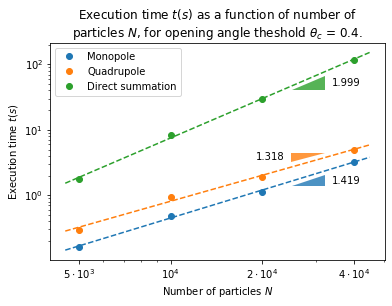

In [9]:
# Mask specific threshold 
mask_theta = df_copy[theta] == 0.4

# Mask mono-/quadrupoles
mask_mono = df_copy[quad] == 'Mono'
mask_quad = mask_mono == False

# Extract timing vectors.
df_copy[mask_theta & mask_mono]
N_vec       = df_copy[mask_theta & mask_mono][N].to_numpy()
t_tree_mono = df_copy[mask_theta & mask_mono][tree].to_numpy()
t_dirsum_m  = df_copy[mask_theta & mask_mono][dirsum].to_numpy()

t_tree_quad = df_copy[mask_theta & mask_quad][tree].to_numpy()
t_dirsum_q  = df_copy[mask_theta & mask_quad][dirsum].to_numpy()

# Get average of direct summation vectors.
t_dirsum = (t_dirsum_m + t_dirsum_q)/2


# Simple linear regression in loglog. 
coef_mono   = np.polyfit(np.log(N_vec), np.log(t_tree_mono), 1)
coef_quad   = np.polyfit(np.log(N_vec), np.log(t_tree_quad), 1)
coef_dirsum = np.polyfit(np.log(N_vec), np.log(t_dirsum), 1)

N_lin = np.linspace(4500, 45000)

# Positions of slope markers
mono_slope_pos   = (25000, 1.4)
quad_slope_pos   = (32000, 4.5)
dirsum_slope_pos = (25000, 40)

# Plotting 
#----------------------------------------------------------------------
plt.figure()

# Obtained data points
plt.loglog(N_vec, t_tree_mono, 'o', label='Monopole') 
plt.loglog(N_vec, t_tree_quad, 'o', label='Quadrupole')
plt.loglog(N_vec, t_dirsum, 'o', label='Direct summation')

# Linear regressions
plt.loglog(N_lin, N_lin**coef_mono[0]*np.exp(coef_mono[1]),'--', color='tab:blue')
plt.loglog(N_lin, N_lin**coef_quad[0]*np.exp(coef_quad[1]),'--', color='tab:orange')
plt.loglog(N_lin, N_lin**coef_dirsum[0]*np.exp(coef_dirsum[1]),'--', color='tab:green')

# Slope indicators
annotation.slope_marker(mono_slope_pos, np.around(coef_mono[0], 3), 
                        poly_kwargs={'facecolor': 'tab:blue', 'alpha': 0.8})
annotation.slope_marker(quad_slope_pos, np.around(coef_quad[0], 3), invert=True, 
                        poly_kwargs={'facecolor': 'tab:orange', 'alpha': 0.8})
annotation.slope_marker(dirsum_slope_pos, np.around(coef_dirsum[0], 3), 
                        poly_kwargs={'facecolor': 'tab:green', 'alpha': 0.8})

# Plot settings
plt.ylabel('Execution time $t(s)$')
plt.xlabel('Number of particles $N$')
plt.title('Execution time $t(s)$ as a function of number of \nparticles $N$, for opening angle theshold $\\theta_c$ = 0.4.')
plt.legend()

# Manual xticks
x_list = ['$\\mathdefault{5 \cdot 10^{3}}$', '$\\mathdefault{10^{4}}$', 
          '$\\mathdefault{2 \cdot 10^{4}}$', '$\\mathdefault{4 \cdot 10^{4}}$']
plt.xticks(N_vec, x_list)

# Save figure
plt.savefig('loglog_TofN.pdf')

Extrapolate execution time for all methods, for a system with $N = 10^{10}$ particles.

In [10]:
# Using the previous linear regression for the extrapolation.
N_extr = 10**10
coef_list = [coef_mono, coef_quad, coef_dirsum]
t_estimate = np.zeros(3)
for i in range(3):
    t_estimate[i] = N_extr**coef_list[i][0]*np.exp(coef_list[i][1])

# Print results
print(f'Tree code, monopoles:   Est. time for N = {N_extr:.2e}, t = {t_estimate[0]:.2} sec or {t_estimate[0]/(60*60*24*365.25):.2} years.')
print(f'Tree code, quadrupoles: Est. time for N = {N_extr:.2e}, t = {t_estimate[1]:.2} sec or {t_estimate[1]/(60*60*24*365.25):.2} years.')
print(f'Direct summation:       Est. time for N = {N_extr:.2e}, t = {t_estimate[2]:.2} sec or {t_estimate[2]/(60*60*24*365.25):.2} years.')

Tree code, monopoles:   Est. time for N = 1.00e+10, t = 1.5e+08 sec or 4.7 years.
Tree code, quadrupoles: Est. time for N = 1.00e+10, t = 6.5e+07 sec or 2.1 years.
Direct summation:       Est. time for N = 1.00e+10, t = 7.5e+12 sec or 2.4e+05 years.
